In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import cv2
from utils.Plotter import Plotter
from model.SIFT import SIFTDetector

In [7]:
img_rol = [
    cv2.imread("data/similaires_rol_compressed/bd6t5106710b_f25.jpg"),
    cv2.imread("data/similaires_rol_compressed/bpt6k97531732_f32.jpg"),
    cv2.imread("data/similaires_rol_compressed/bpt6k65785706_f147.jpg"),
    cv2.imread("data/similaires_rol_compressed/bpt6k65283771_f185.jpg"),
    cv2.imread("data/similaires_rol_compressed/bpt6k57703561_f7.jpg"),
    cv2.imread("data/similaires_rol_compressed/bpt6k46270941_f3.jpg"),
    cv2.imread("data/similaires_rol_compressed/bpt6k34538723_f1.jpg"),
    cv2.imread("data/similaires_rol_compressed/bpt6k46270941_f3.jpg"),
    cv2.imread("data/similaires_rol_compressed/bpt6k11964323_f10.jpg"),
    cv2.imread("data/similaires_rol_compressed/bpt6k11963513_f20.jpg"),

]
img_simlaire = cv2.imread("data/test.jpg")

array([[[236, 226, 226],
        [236, 226, 226],
        [237, 227, 227],
        ...,
        [240, 230, 230],
        [241, 231, 231],
        [242, 232, 232]],

       [[236, 226, 226],
        [237, 227, 227],
        [237, 227, 227],
        ...,
        [240, 230, 230],
        [240, 230, 230],
        [241, 231, 231]],

       [[237, 227, 227],
        [237, 227, 227],
        [237, 227, 227],
        ...,
        [240, 230, 230],
        [240, 230, 230],
        [239, 229, 229]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

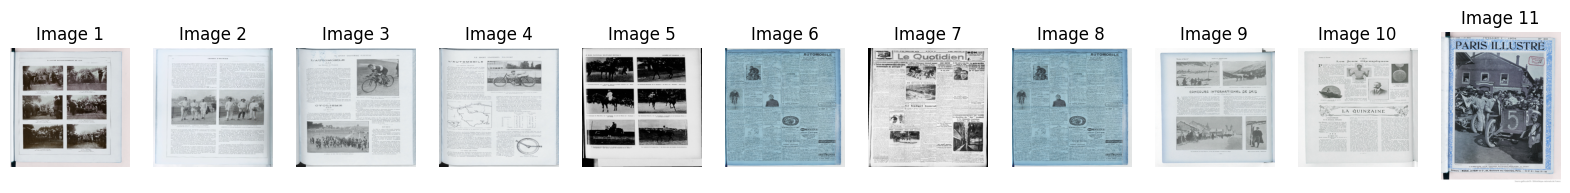

In [8]:
img_rol.extend([img_simlaire])
img_tiltes = [f"Image {i}" for i in range(1, len(img_rol)+1)]
Plotter.plot_images(img_rol, img_tiltes, fig_size=(20,15))
img_rol.pop()

In [9]:
all_keypoints_descriptors = [SIFTDetector.computeSIFT(img) for img in img_rol]
keypoints, descriptors = SIFTDetector.computeSIFT(img_simlaire)

In [10]:
best_match_img_index, best_match_len_good_kp, best_match_good_kp = SIFTDetector.getBestMatch(descriptors, [ kp_des[1] for kp_des in all_keypoints_descriptors])

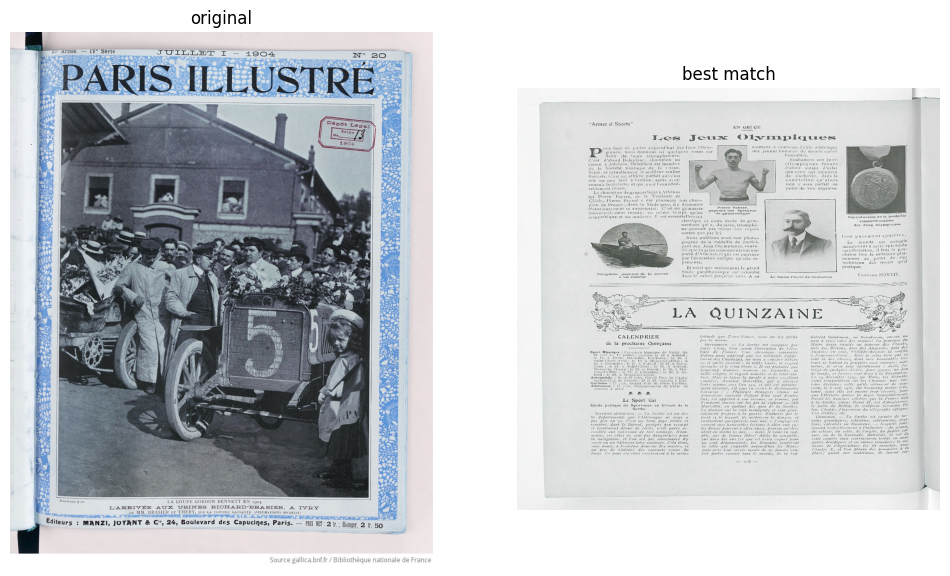

In [11]:
img_best = img_rol[best_match_img_index]
Plotter.plot_compare(img_simlaire, img_best, "original", "best match")

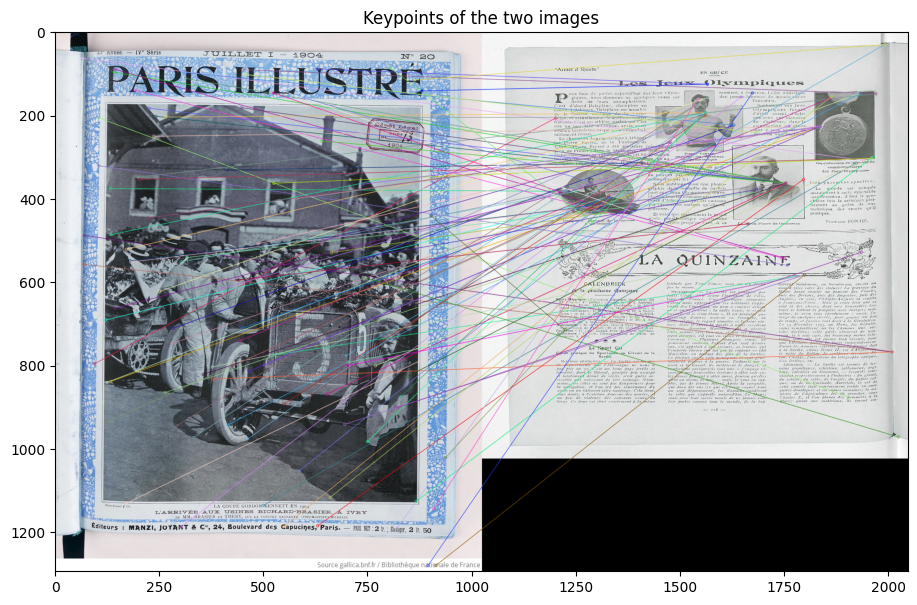

In [12]:
img_best_kp = SIFTDetector.computeSIFT(img_best)[0]
SIFTDetector.displayKeypoints(img_simlaire, keypoints, img_best, img_best_kp, best_match_good_kp)